In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded= files.upload()

Saving movie.csv to movie (1).csv


In [3]:
df=pd.read_csv("movie.csv")
df.head()


,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
df.describe()


,label
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [5]:
df.shape

(40000, 2)

In [6]:
#checking for duplicate entries
df.duplicated().sum()


np.int64(277)

In [7]:
df = df.drop_duplicates()

In [8]:
#checking for unique values in column 2(if any value except 0/1)
df['label'].unique()


array([0, 1])

In [9]:
#checking for null values
df.isnull().sum()
#we get no null values and no reduncnaies

,0
text,0
label,0


In [10]:
df = df[df['label'].isin([0, 1])]

In [11]:
print(df['label'].value_counts())

label
1    19908
0    19815
Name: count, dtype: int64


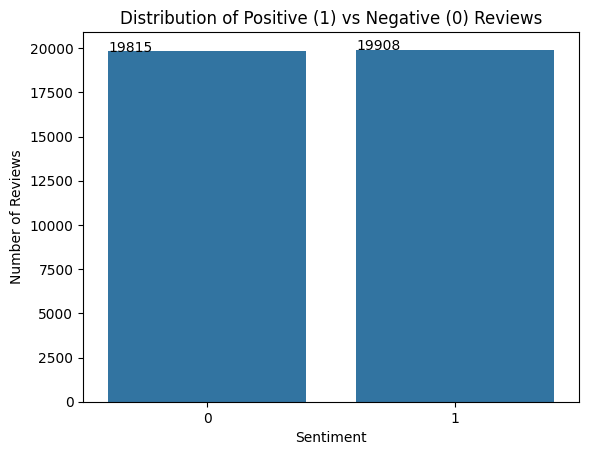

In [42]:
#now looking at number of positive and negative reviews
ax= sns.countplot(x='label', data=df)
plt.title("Distribution of Positive (1) vs Negative (0) Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
for bar in ax.patches:
    plt.text(bar.get_x(), bar.get_height(), str(int(bar.get_height())))
plt.show()

In [43]:
df['review_length'] = df['text'].apply(len)

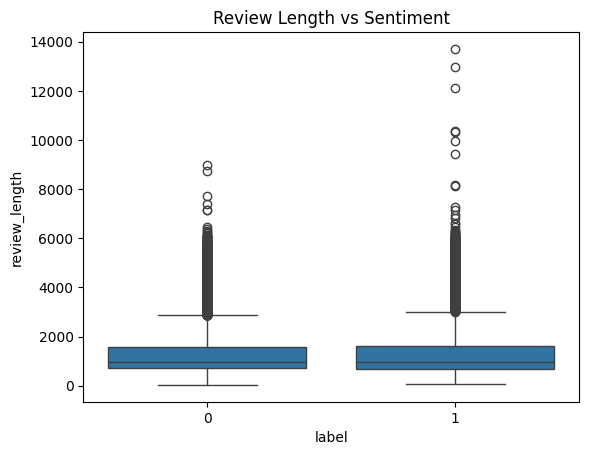

In [44]:
#boxplot:easy tpo find outliers and median etc, becomes easier to compare
sns.boxplot(data=df, x='label', y='review_length')
plt.title("Review Length vs Sentiment")
plt.show()
#plot shows that review length is almost same for boht, might be little longer for postive reviews as more outliers

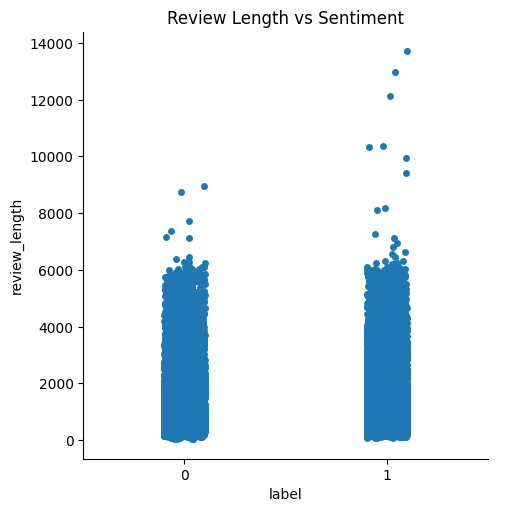

In [15]:
#i created a catplot as well, as i wasnt sure which out of boxplot and catplot willl show better comparison, both gave out same inference
sns.catplot(data=df, x='label', y='review_length')
plt.title("Review Length vs Sentiment")
plt.show()

In [16]:
#DATA PREPROCESSING
#importing necessary things
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer


In [17]:

#downloading nltk resorices
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
#intialising tools
stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [19]:
#creating function so that can work easily
def preprocessing(text):
  #all upper case to all lower case
  text=text.lower()
  #removing special charcters etc
  text=re.sub(r'[^a-z\s]', '', text)

  #tokenisation
  tokens=word_tokenize(text)
  #Remove stopwords
  tokens=[word for word in tokens if word not in stop_words]
  #lemmatization
  tokens=[lemmatizer.lemmatize(word) for word in tokens]

  return ' '.join(tokens)

df['clean text']=df['text'].apply(preprocessing)

#checking final result; now we get two columns, text and clean text
df[['text','clean text']].head()


,text,clean text
0,I grew up (b. 1965) watching and loving the Th...,grew b watching loving thunderbird mate school...
1,"When I put this movie in my DVD player, and sa...",put movie dvd player sat coke chip expectation...
2,Why do people who do not know what a particula...,people know particular time past like feel nee...
3,Even though I have great interest in Biblical ...,even though great interest biblical movie bore...
4,Im a die hard Dads Army fan and nothing will e...,im die hard dad army fan nothing ever change g...


In [45]:
#splittting and training data
from sklearn.model_selection import train_test_split

X = df['clean text']  # input: cleaned text
y = df['label']       # output: target class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a vectorizer object
vectorizer = TfidfVectorizer()

# Fit on training data and transform both train and test
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [47]:
from sklearn.naive_bayes import MultinomialNB
#creates Naive Bayes model,stores it in the variable model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test_tfidf)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.865449968533669
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87      3991
           1       0.87      0.86      0.86      3954

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.87      7945
weighted avg       0.87      0.87      0.87      7945

Confusion Matrix:
 [[3481  510]
 [ 559 3395]]


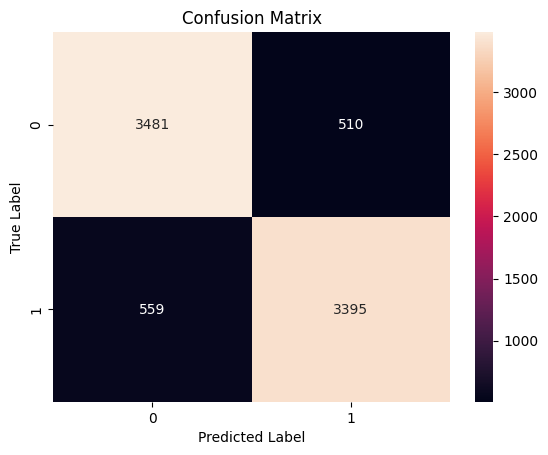

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [56]:
# trying Logistic Regression to see if it does better
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_tfidf, y_train)

# Predicting on the test data
y_pred_logreg = logreg.predict(X_test_tfidf)

# accuracy and analysis to compare
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print( classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8852108244178729
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      3991
           1       0.87      0.90      0.89      3954

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



ROC AUC Score for Naive Bayes: 0.939


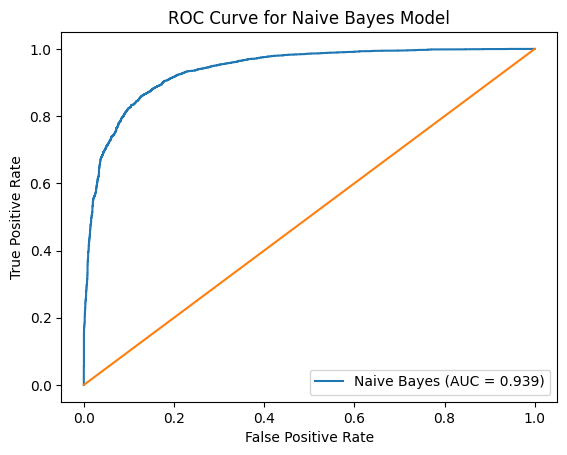

In [57]:
# checking the ROC curve for Naive Bayes to understand how well it separates classes

from sklearn.metrics import roc_curve, roc_auc_score

# getting predicted probabilities for positive class (label=1)
y_probs = model.predict_proba(X_test_tfidf)[:, 1]

# calculating false , true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate Area Under the Curve score
auc_score = roc_auc_score(y_test, y_probs)
print(f'ROC AUC Score for Naive Bayes: {auc_score:.3f}')

# Plotting curve
plt.figure()
plt.plot(fpr, tpr, label=f'Naive Bayes (AUC = {auc_score:.3f})')
plt.plot([0,1], [0,1])  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naive Bayes Model')
plt.legend()
plt.show()


In [58]:
# didnt understand this but according to chatgpt i should save the model and vectorizer so I don’t have to retrain every time i run the notebook
import joblib

joblib.dump(model, 'naive_bayes_model.joblib')
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']